In [1]:
%matplotlib inline
from scipy.integrate import quad
from numpy import *
from matplotlib.pyplot import *
style.use('classic')

Consideramos las ecuación de onda unidimensional, con las siguientes condiciones de borde,

$$
\psi(0,t)=0,\qquad \psi(L,t)=0,\qquad \psi(x,0)=\psi_{0}(x),\qquad \frac{\partial \psi}{\partial t}(x,0)=v_{0}(x),
$$
donde $\psi_{0}(x)$ y $v_{0}(x)$ son funciones conocidas. Usando el MSV encontramos la solución de la forma siguiente,

$$
\psi(x,t)=\sum_{n =1}^{\infty} \left[A_{n}\cos\left(\frac{n \pi v}{L}t\right)+B_{n}\sin\left(\frac{n \pi v}{L}t\right)\right] \sin(\frac{n\pi x}{L}),
$$
con los coeficientes $A_{n}$ y $B_{n}$ dados por

$$
A_{n}=\frac{2}{L}\int_{0}^{L} \psi_{0}(x)\sin(\frac{k\pi x}{L})dx, \qquad
B_{n}=\frac{2}{n \pi v}\int_{0}^{L} v_{0}(x)\sin(\frac{k\pi x}{L})dx.
$$

## Ejemplo

Consideremos el caso en que $\psi_0(x)=0$ y 

$$
v_0(x)=\left\{\begin{array}{cl} V\cos\left(\frac{\pi(x-\xi)}{d}\right), & \text{para }|x-\xi|<d/2 \\
0, & \text{para }|x-\xi|>d/2
\end{array}.\right.
$$

En este caso, $A_n=0$, mientras que los coeficientes $B_n$ serán calculados numéricamente.

## Cálculo numérico de coeficientes y solución:

Definimos la función $v_{0}(x)$.

In [2]:
L = 1. # largo de la cuerda
xi = 0.7 
d = 0.3 
v = 1. # velocidad de la onda
V = 1.

def v0(x):
    if abs(x-xi)<(d/2.):
        return V*cos(pi*(x-xi)/d)
    else:
        return 0

Los coeficientes $B_{n}$ se calculan numéricamente usando la función `quad` de Numpy:

In [3]:
def integrando_b(x,n):
    return v0(x)*sin(((n*pi)/L)*x)
def B(n):
    return (2/(n*pi*v))*quad(integrando_b,0, L, args=n)[0]

Por ejemplo, el término $B_7$ es dado por

In [4]:
B(7)

0.0015546454953414815

Ahora definimos la suma parcial $S(n_{\rm max},x,t)$ dada pr

$$
S(n_{\rm max},x,t)=\sum_{n =1}^{n_{\rm max}}B_{n}\sin\left(\frac{n \pi v}{L}t\right)\sin(\frac{n\pi x}{L}).
$$

In [5]:
def S(nmax,x,t):
    S = 0
    for n in range(1,nmax+1):
        S = S + B(n)*sin(((n*pi*v)/L)*t)*sin(((n*pi)/L)*x)
    return S

Y preparamos el gráfico correspondiente a cada valor de $t$:

In [6]:
nmax = 100
x = linspace(0,L,1000)

In [7]:
def g(t):
    plot(x,S(nmax,x,t),label='$\Psi(x,%4.2f)$'%t)
    xlim(0,L)
    ylim(-1,1)
    xticks([0,L,xi,xi-d/2.,xi+d/2.],['$0$','$L$',r'$\xi$',r'$\xi-d/2$',r'$\xi+d/2$'])
    #yticks([-A,0,A],['$-A$','$0$','$A$'])
    yticks([])
    grid()
    legend()
    title('Cuerda con extremos fijos')
    xlabel('$x$',fontsize=15)
    ylabel('$\Psi(x,t)$',fontsize=15)

/home/gr/anaconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


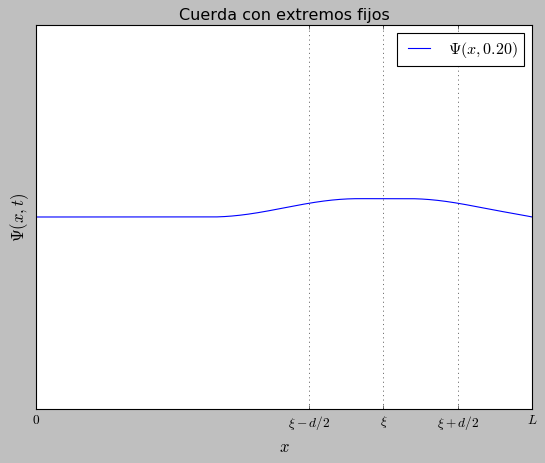

In [8]:
g(0.2)

Ahora, en forma interactiva...

In [9]:
from ipywidgets import interact

<function __main__.g>

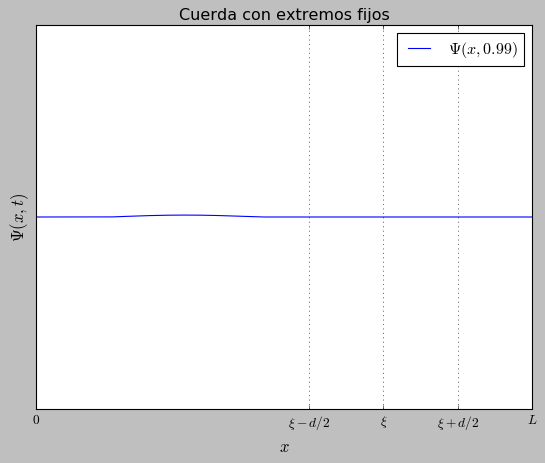

In [10]:
interact(g,t=(0,2,0.01))

Finalmente, podemos crear una animación:

In [11]:
from matplotlib.animation import FuncAnimation

/home/gr/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


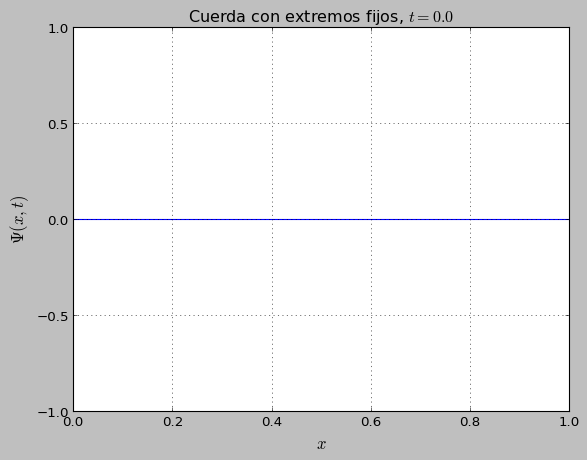

In [12]:
fig, ax = subplots()

ax.set_ylim(-1,1)
ax.grid()
ax.set_xlim(0,L)
ax.set_xlabel('$x$',fontsize=15)
ax.set_ylabel('$\Psi(x,t)$',fontsize=15)
#ax.yticks([])
#ax.xticks([0,L,xi,xi-d/2.,xi+d/2.],['$0$','$L$',r'$\xi$',r'$\xi-d/2$',r'$\xi+d/2$'])
ax.legend()
ax.set_title('Cuerda con extremos fijos, $t=0$')

line = ax.plot(x,S(nmax,x,0))[0]

def animate(i):
    t = 0.05*i
    ax.set_title(ur'Cuerda con extremos fijos, $t=%.1f$' %t)
    line.set_ydata(S(nmax,x,t))
    
anim = FuncAnimation(fig, animate, interval=100, frames=40) #100 msec entre frames

anim.save('fig-cuerda-1D-01.gif', writer='imagemagick')